# Dataset

Os dados são de clientes do Ifood visando criar a segmentação de clientes e um modelo que consiga prever a probabilidade do cliente ser impactado por uma campanha de oferta

## Metadados
Pessoas:
- ID: Identificador único do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: Nível de educação do cliente
- Marital_Status: Estado civil do cliente
- Income: Renda anual do agregado familiar do cliente
- Kidhome: Número de crianças no agregado familiar do cliente
- Teenhome: Número de adolescentes no agregado familiar do cliente
- Dt_Customer: Data de inscrição do cliente na empresa
- Recency: Número de dias desde a última compra do cliente
- Complain: 1 se o cliente fez uma reclamação nos últimos 2 anos, 0 caso contrário

-----------------

Produtos
- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto em frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto em carne nos últimos 2 anos
- MntFishProducts: Valor gasto em peixe nos últimos 2 anos
- MntSweetProducts: Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Valor gasto em ouro nos últimos 2 anos

-----------------

Promoção:
- NumDealsPurchases: Número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

-----------------

Meio:
- NumWebPurchases: Número de compras feitas através do site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente em lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês

# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Investigação inicial do dataset

In [10]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df.duplicated().sum()

0

In [17]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [18]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [19]:
df['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [20]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [21]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [25]:
df['Income'].isna().sum()

24

# Ajuste inicial dos dados

In [22]:
df2 = df.copy(deep=True)

In [32]:
df2['Marital_Status'] = df2['Marital_Status'].map({'Single': 'Single', 'Together': 'Together', 'Married': 'Married', 'Divorced': 'Divorced', 'Widow': 'Widow', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

In [35]:
df2.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [40]:
df2['Income'] = df2['Income'].apply(lambda x: 0 if np.isnan(x) else x)

In [ ]:
df2['Age'] = df2['Year_Birth'].apply(lambda x: 2020 - x)

# Visualização inicial dos dados

## Pessoas

### Ano de Nascimento

<Axes: xlabel='Year_Birth', ylabel='Count'>

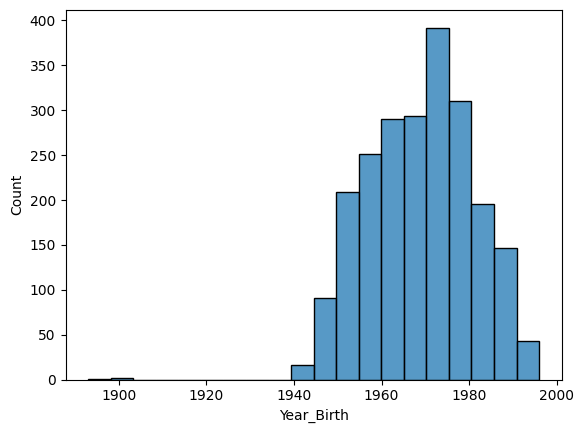

In [42]:
sns.histplot(df2, x="Year_Birth", bins=20)

### Escolaridade

<Axes: xlabel='Education', ylabel='Count'>

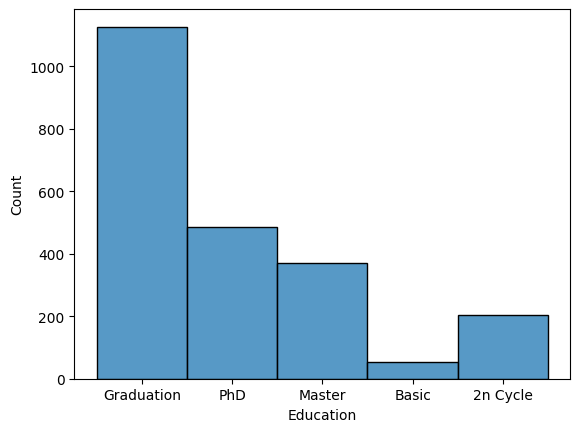

In [43]:
sns.histplot(df2, x="Education", bins=20)

### Estado civil

<Axes: xlabel='Marital_Status', ylabel='Count'>

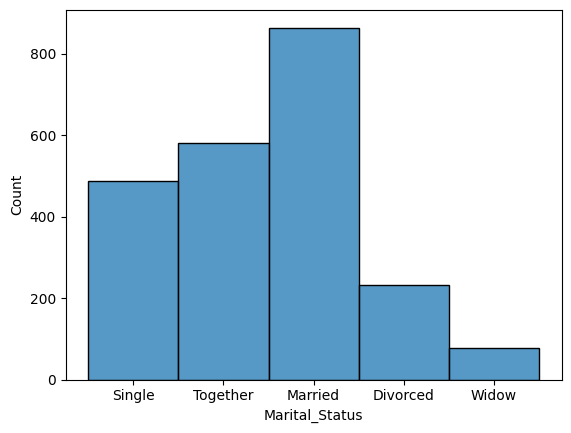

In [44]:
sns.histplot(df2, x="Marital_Status", bins=20)

### Renda Anual

<Axes: xlabel='Income', ylabel='Count'>

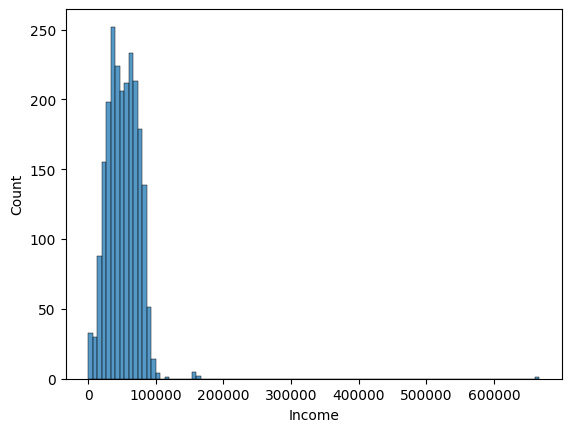

In [47]:
sns.histplot(df2, x="Income", bins=100)

### Número de crianças

<Axes: xlabel='Kidhome', ylabel='Count'>

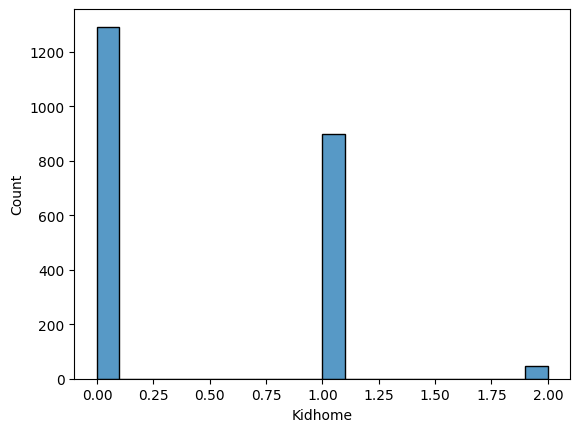

In [58]:
sns.histplot(df2, x="Kidhome", bins=20)

### Número de adolescentes

<Axes: xlabel='Teenhome', ylabel='Count'>

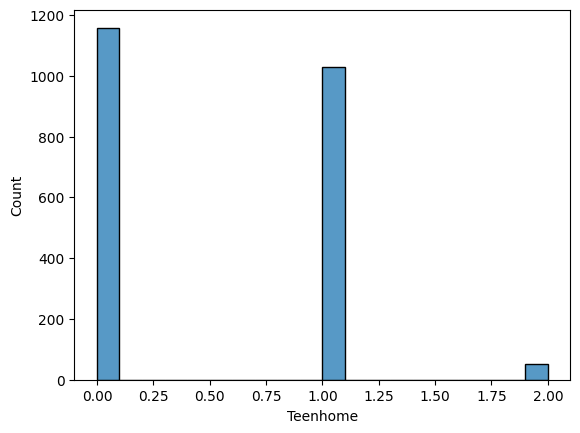

In [59]:
sns.histplot(df2, x="Teenhome", bins=20)

### Data de inscrição na empresa

<Axes: xlabel='Dt_Customer', ylabel='Count'>

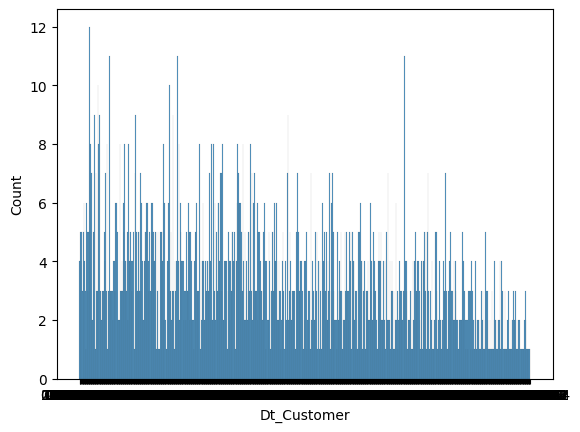

In [60]:
sns.histplot(df2, x="Dt_Customer", bins=20)

### Dias desde a última compra

<Axes: xlabel='Recency', ylabel='Count'>

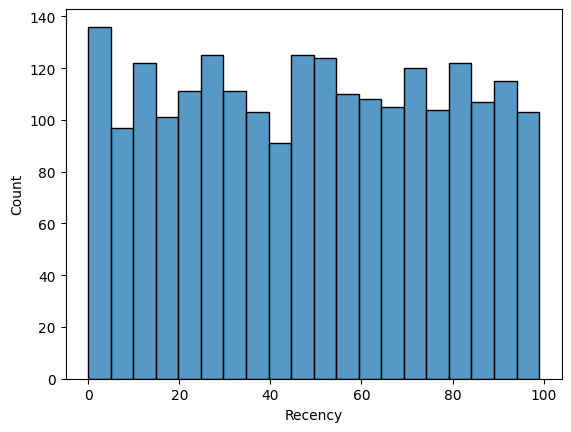

In [61]:
sns.histplot(df2, x="Recency", bins=20)

### Reclamação nos últimos 2 anos

<Axes: xlabel='Complain', ylabel='Count'>

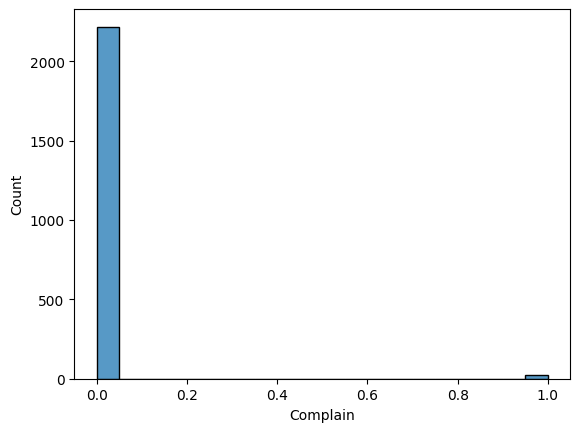

In [62]:
sns.histplot(df2, x="Complain", bins=20)

## Produtos

**Valores gastos em produtos nos últimos 2 anos**

### Vinho

<Axes: xlabel='MntWines', ylabel='Count'>

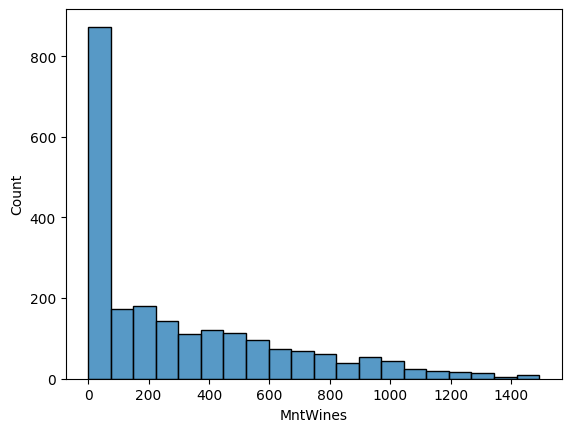

In [65]:
sns.histplot(df2, x="MntWines", bins=20)

### Frutas

<Axes: xlabel='MntFruits', ylabel='Count'>

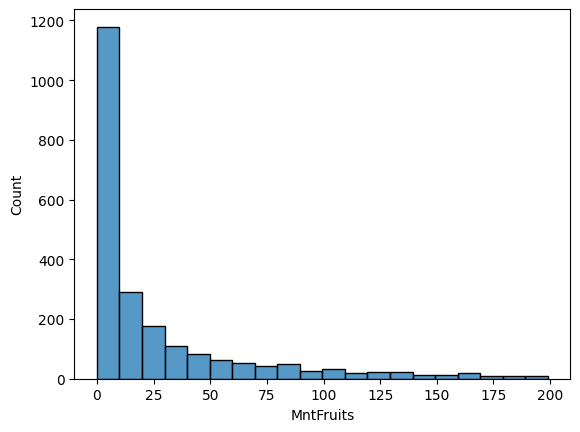

In [66]:
sns.histplot(df2, x="MntFruits", bins=20)

### Carnes

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

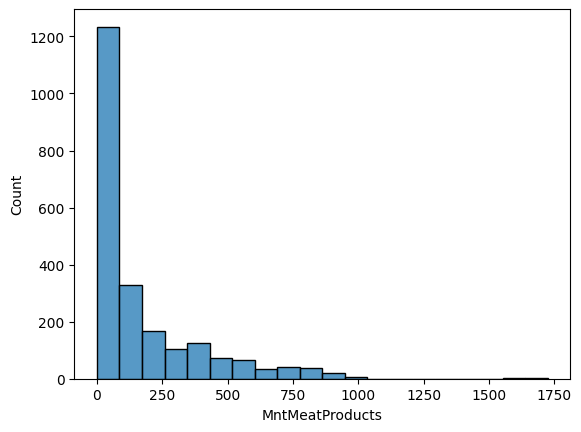

In [67]:
sns.histplot(df2, x="MntMeatProducts", bins=20)

### Peixes

<Axes: xlabel='MntFishProducts', ylabel='Count'>

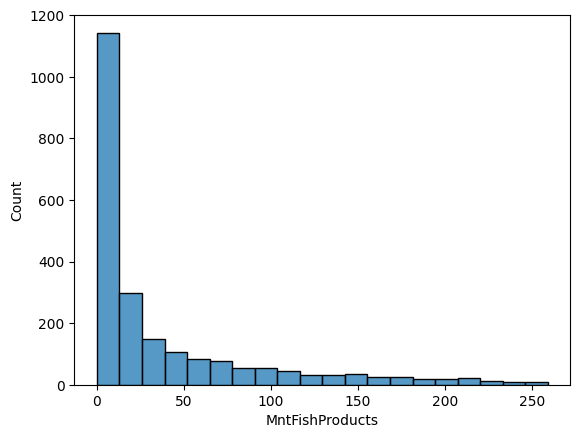

In [68]:
sns.histplot(df2, x="MntFishProducts", bins=20)

### Doces

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

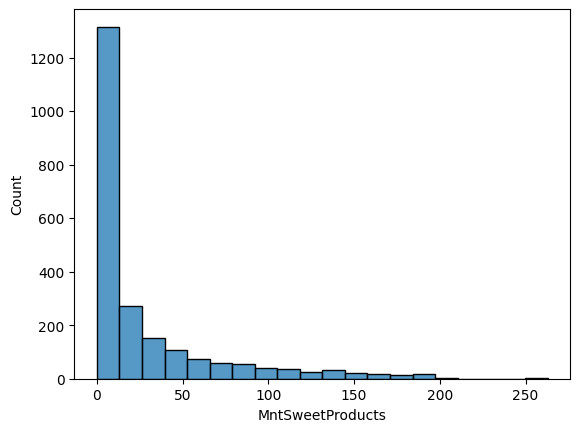

In [69]:
sns.histplot(df2, x="MntSweetProducts", bins=20)

### Produtos Ouro

<Axes: xlabel='MntGoldProds', ylabel='Count'>

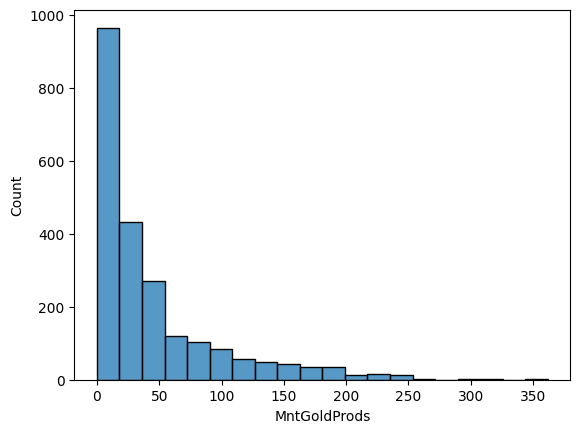

In [70]:
sns.histplot(df2, x="MntGoldProds", bins=20)

## Promoção

### Compras com desconto

<Axes: xlabel='NumDealsPurchases', ylabel='Count'>

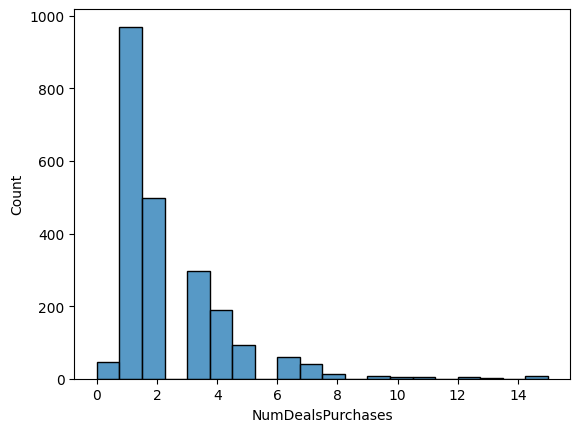

In [71]:
sns.histplot(df2, x="NumDealsPurchases", bins=20)

### Compra na 1ª oferta

<Axes: xlabel='AcceptedCmp1', ylabel='Count'>

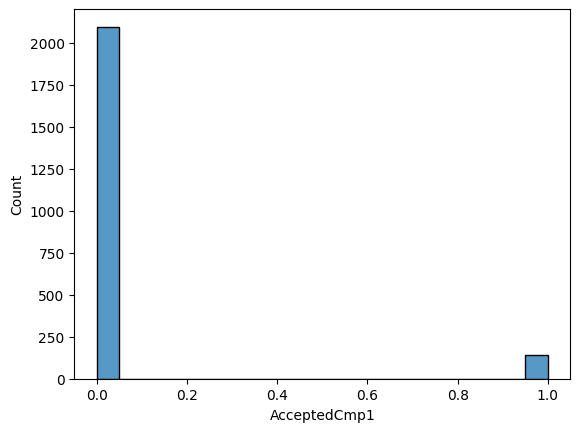

In [72]:
sns.histplot(df2, x="AcceptedCmp1", bins=20)

### Compra na 2ª oferta

<Axes: xlabel='AcceptedCmp2', ylabel='Count'>

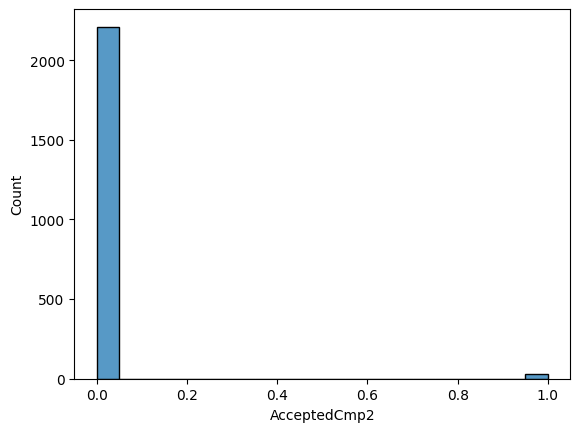

In [73]:
sns.histplot(df2, x="AcceptedCmp2", bins=20)

### Compra na 3ª oferta

<Axes: xlabel='AcceptedCmp3', ylabel='Count'>

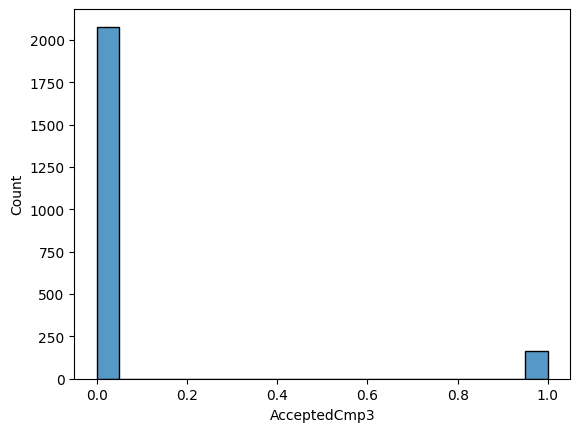

In [74]:
sns.histplot(df2, x="AcceptedCmp3", bins=20)

### Compra na 4ª oferta

<Axes: xlabel='AcceptedCmp4', ylabel='Count'>

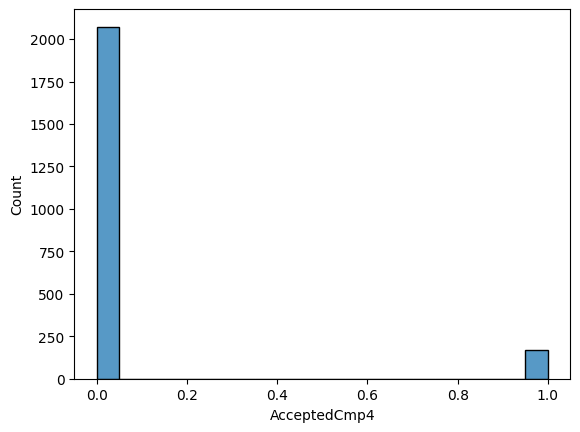

In [75]:
sns.histplot(df2, x="AcceptedCmp4", bins=20)

### Compra na 5ª oferta

<Axes: xlabel='AcceptedCmp5', ylabel='Count'>

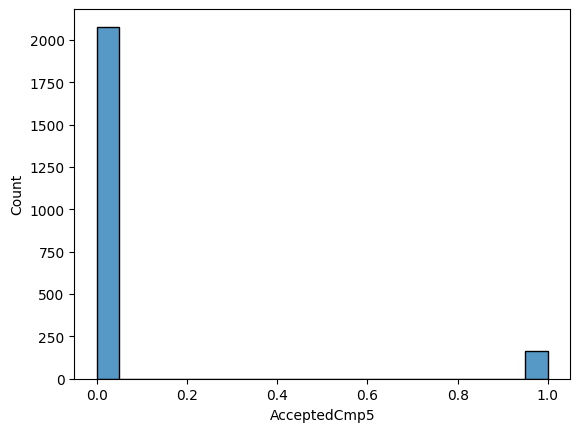

In [76]:
sns.histplot(df2, x="AcceptedCmp5", bins=20)

### Compra na última oferta

<Axes: xlabel='Response', ylabel='Count'>

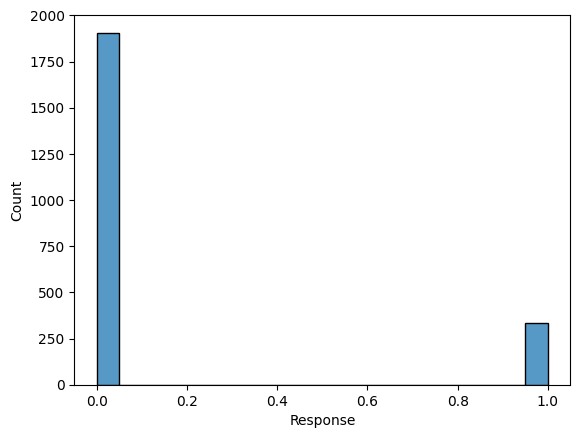

In [77]:
sns.histplot(df2, x="Response", bins=20)

## Meio

### Compras feitas por site

<Axes: xlabel='NumWebPurchases', ylabel='Count'>

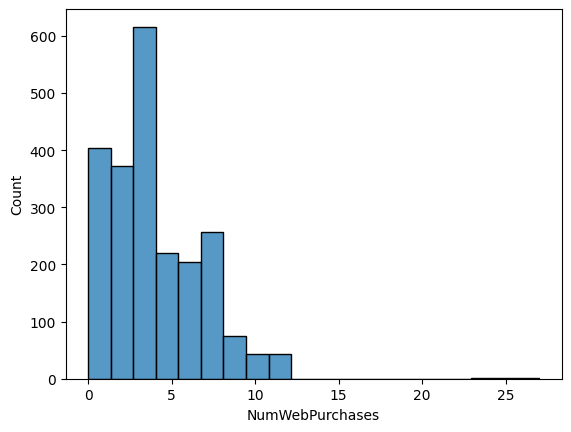

In [78]:
sns.histplot(df2, x="NumWebPurchases", bins=20)

### Compras feitas com catálogo

<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>

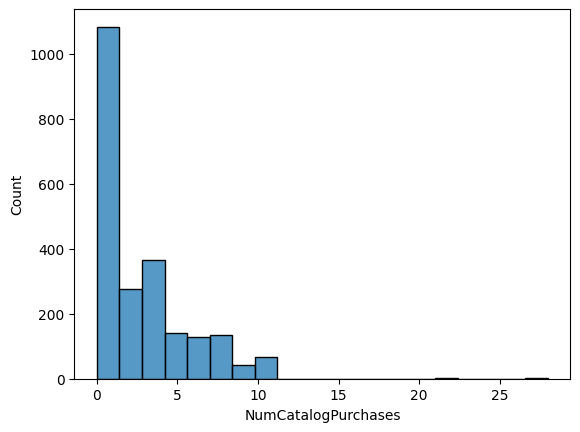

In [79]:
sns.histplot(df2, x="NumCatalogPurchases", bins=20)

### Compras feitas diretamente nas lojas

<Axes: xlabel='NumStorePurchases', ylabel='Count'>

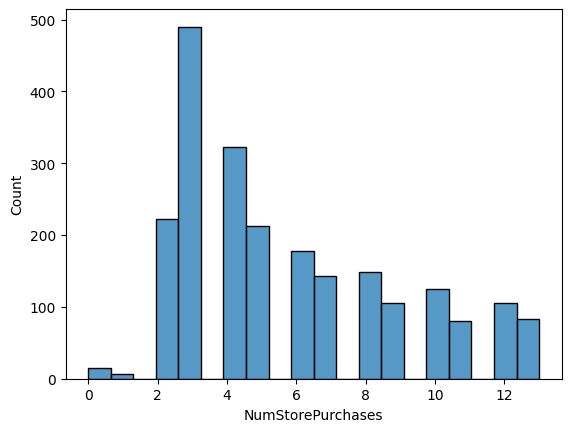

In [83]:
sns.histplot(df2, x="NumStorePurchases", bins=20)

### Visitas feitas ao site no último mês

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

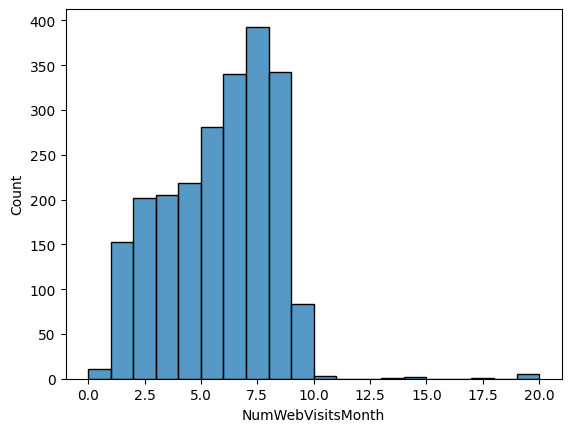

In [81]:
sns.histplot(df2, x="NumWebVisitsMonth", bins=20)

# Transformações e adições

### Educação

In [86]:
df2 = pd.get_dummies(df2, columns=["Education"], prefix="Education")

### Estado civil

In [88]:
df2 = pd.get_dummies(df2, columns=["Marital_Status"], prefix="Marital_Status")

### Renda Anual

In [89]:
df2['Income'] = df2['Income'].apply(lambda x: int(x))

### Compra em oferta

In [93]:
df2['AcceptedCmpOverall'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5'] + df2['Response']
df2['AcceptedCmpOverall'] = df2['AcceptedCmpOverall'].apply(lambda x: 1 if x>0 else 0)

# Ajustes prévios a modelagem

In [96]:
df2.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'MY_Dt_Customer', 'AcceptedCmpOverall'],
      dtype='object')

In [97]:
df2.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)

# Análise de correlações

<ipython-input-99-74dbfedb4812>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')


<Axes: >

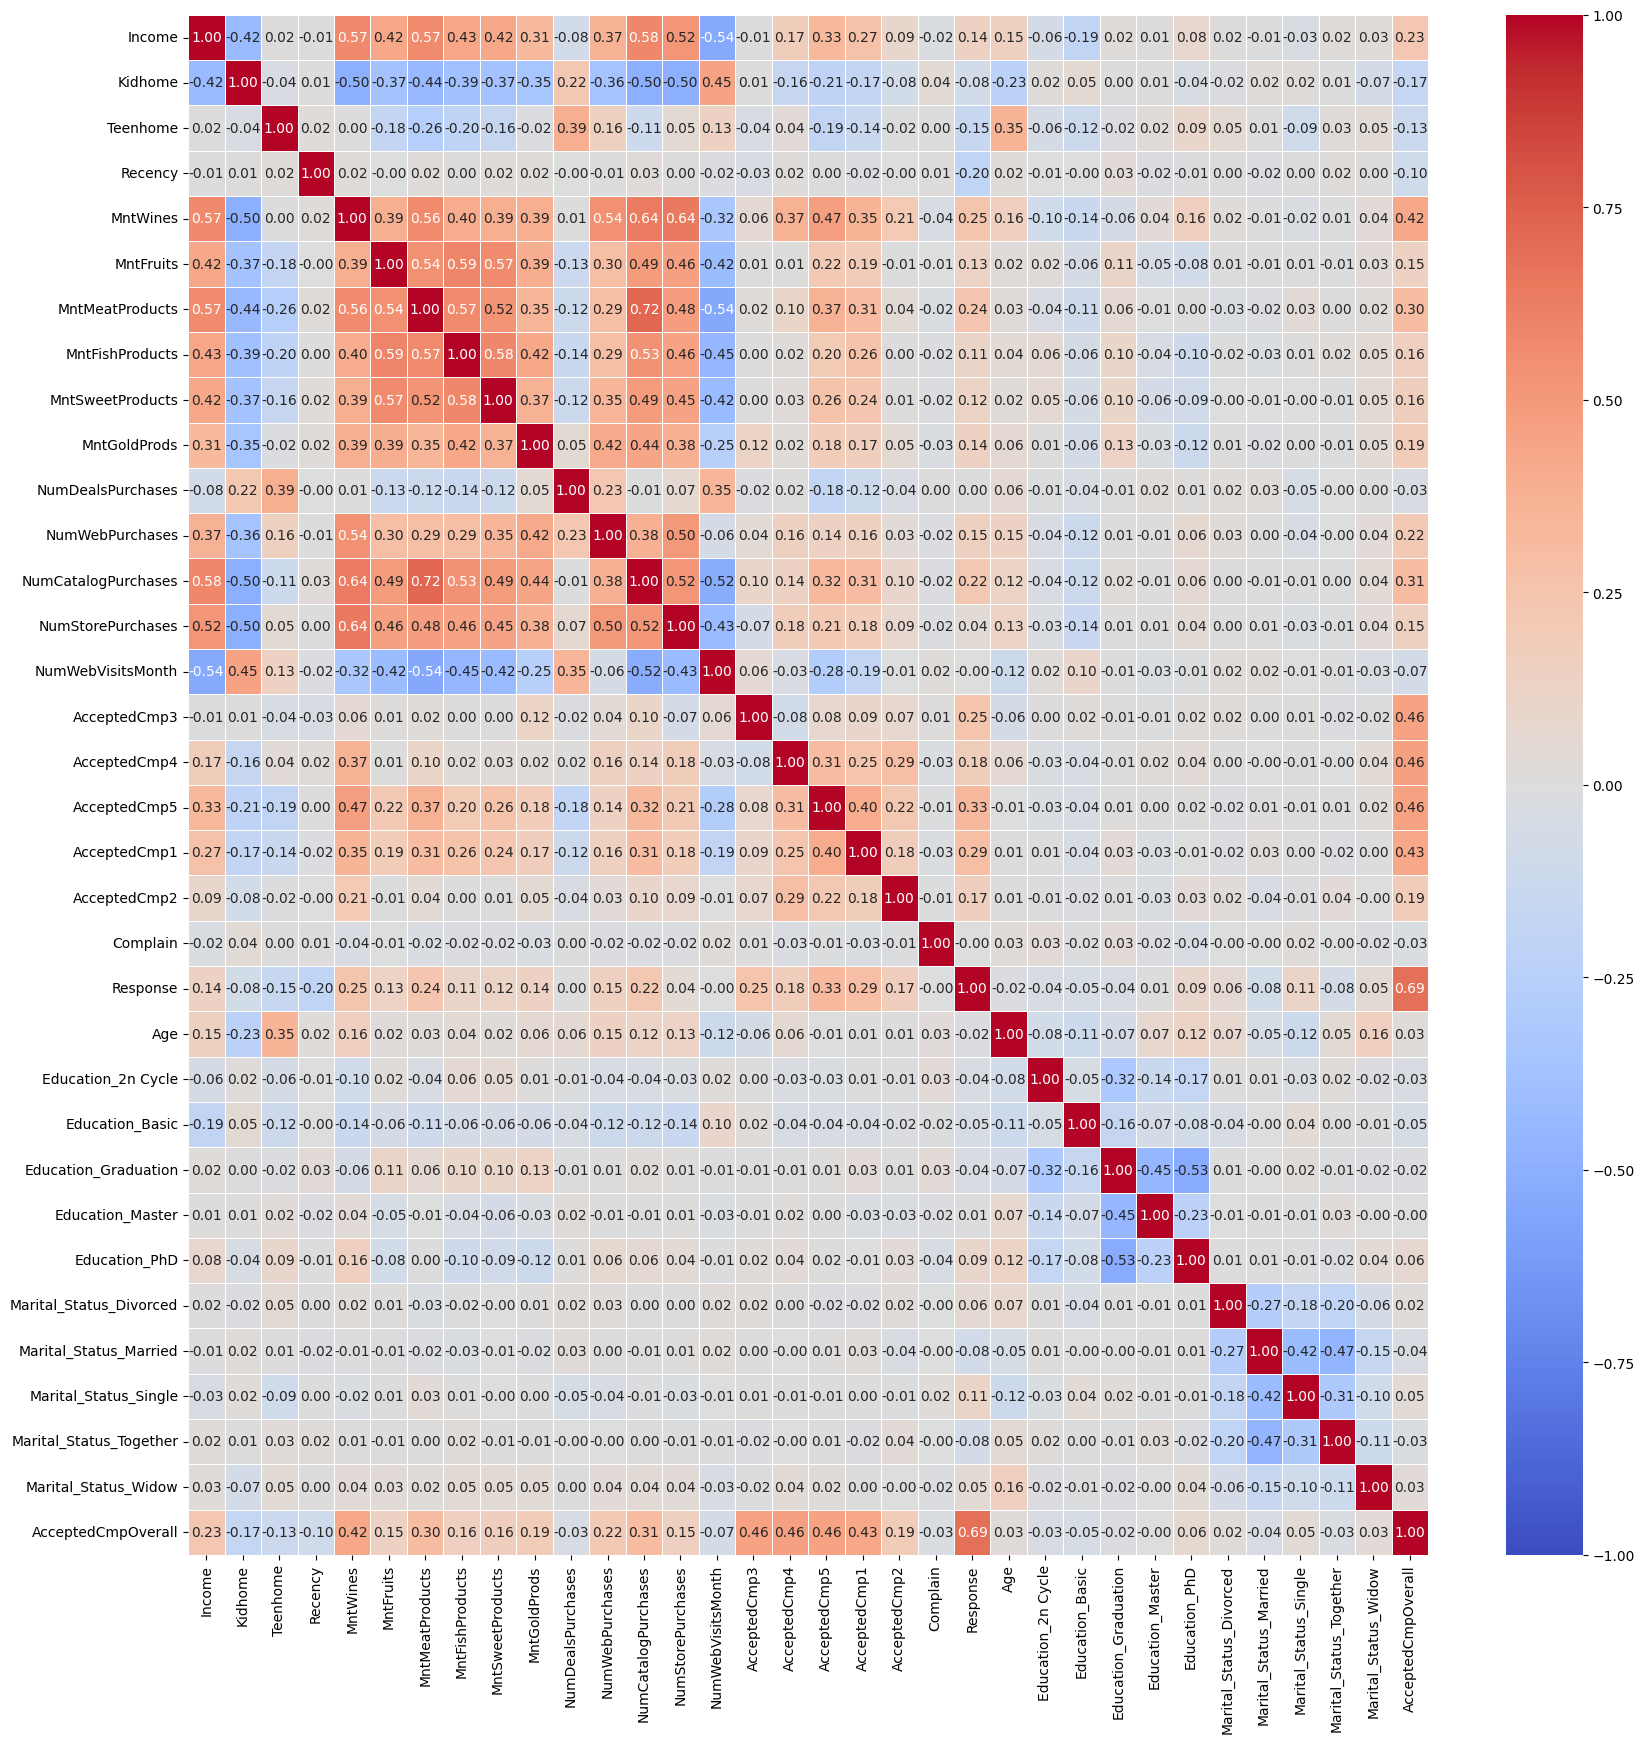

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

In [162]:
target_corr_temp = abs(df2.corr().drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','AcceptedCmpOverall']).loc['AcceptedCmpOverall']).sort_values(ascending=False)

target_corr = {}
df2_columns_to_drop = []

for i in range(len(target_corr_temp.index)):
  if target_corr_temp.values[i] >= 0.05:
    target_corr[target_corr_temp.index[i]] = target_corr_temp.values[i]
  else:
    df2_columns_to_drop.append(target_corr_temp.index[i])

target_corr = pd.Series(data=target_corr)

<ipython-input-162-e6ee1cb25ea2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr_temp = abs(df2.corr().drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','AcceptedCmpOverall']).loc['AcceptedCmpOverall']).sort_values(ascending=False)


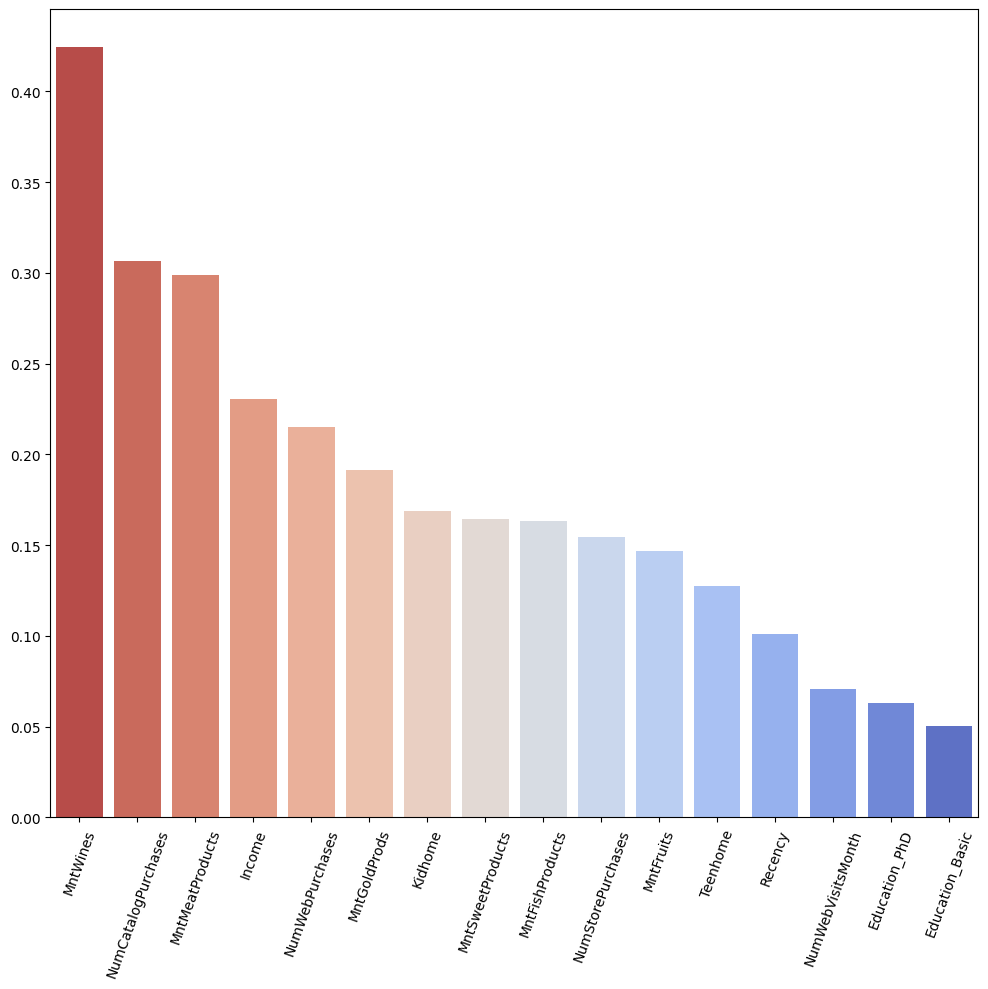

In [173]:
plt.figure(figsize=(10,10))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm_r')
plt.xticks(rotation=70)
plt.tight_layout()

Baseado no heatmap, para o nosso target 'AcceptecCmpOverall', faz sentido droparmos as seguintes colunas:
 - 'AcceptedCmp1' (Multicolinearidade)
 - 'AcceptedCmp2' (Multicolinearidade)
 - 'AcceptedCmp3' (Multicolinearidade)
 - 'AcceptedCmp4' (Multicolinearidade)
 - 'AcceptedCmp5' (Multicolinearidade)
 - 'Response' (Multicolinearidade)

 Além disso, vamos manter um mínimo de 0.05 para correlação absoluta

In [165]:
df2_columns_to_drop.append('AcceptedCmp1')
df2_columns_to_drop.append('AcceptedCmp2')
df2_columns_to_drop.append('AcceptedCmp3')
df2_columns_to_drop.append('AcceptedCmp4')
df2_columns_to_drop.append('AcceptedCmp5')
df2_columns_to_drop.append('Response')

In [171]:
df2_predictive_model = df2.copy(deep=True)
df2_predictive_model.drop(columns=df2_columns_to_drop, inplace=True)

In [172]:
df2_predictive_model

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_Basic,Education_PhD,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,8,10,4,7,0,0,1
1,46344,1,1,38,11,1,6,2,1,6,1,1,2,5,0,0,0
2,71613,0,0,26,426,49,127,111,21,42,8,2,10,4,0,0,0
3,26646,1,0,26,11,4,20,10,3,5,2,0,4,6,0,0,0
4,58293,1,0,94,173,43,118,46,27,15,5,3,6,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,9,3,4,5,0,0,0
2236,64014,2,1,56,406,0,30,0,0,8,8,2,5,7,0,1,1
2237,56981,0,0,91,908,48,217,32,12,24,2,3,13,6,0,0,1
2238,69245,0,1,8,428,30,214,80,30,61,6,5,10,3,0,0,0
